# Plotting/analysis file for PEC Data

In [137]:
import functools
import os
import time
from typing import List
import matplotlib.pyplot as plt
import cirq
import networkx as nx
import numpy as np
import qiskit
from mitiq import benchmarks, pec

from qiskit_ibm_runtime.fake_provider import FakeTorino, FakeSherbrooke

from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

from qiskit import QuantumCircuit

2-qubit Data with usefulness cutoff

In [138]:
# Generic data

generic_ideal_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Generic_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\true_values2025-05-19_19-05-16.txt", delimiter = " ")
generic_ideal_2qavgs = np.average(generic_ideal_2qvals, axis=1)

generic_raw_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Generic_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\noisy_values2025-05-19_19-05-16.txt", delimiter = " ")
generic_raw_2qavgs = np.average(generic_raw_2qvals, axis=1)
generic_raw_2qstds = np.std(generic_raw_2qvals, axis=1, ddof=1)
generic_raw_2qpercentile = np.percentile(generic_raw_2qvals, 10, axis=1)

generic_pec_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Generic_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\pec_values2025-05-19_19-05-16.txt", delimiter = " ")
generic_pec_2qavgs = np.average(generic_pec_2qvals, axis=1)
generic_pec_2qstds = np.std(generic_pec_2qvals, axis=1, ddof=1)
generic_pec_2qpercentile = np.percentile(generic_pec_2qvals, 10, axis=1)

generic_2qdepths = np.arange(10,len(generic_ideal_2qvals)+10)

generic_raw_2qerrors = np.abs([a_i - b_i for a_i, b_i in zip(generic_raw_2qavgs, generic_ideal_2qavgs)])
generic_pec_2qerrors = np.abs([a_i - b_i for a_i, b_i in zip(generic_pec_2qavgs, generic_ideal_2qavgs)])


# Sherbrooke data
sherbrooke_ideal_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Sherbrooke_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\true_values2025-05-14_15-52-13.txt", delimiter = " ")
sherbrooke_ideal_2qavgs = np.average(sherbrooke_ideal_2qvals, axis=1)

sherbrooke_raw_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Sherbrooke_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\noisy_values2025-05-14_15-52-13.txt", delimiter = " ")
sherbrooke_raw_2qavgs = np.average(sherbrooke_raw_2qvals, axis=1)
sherbrooke_raw_2qstds = np.std(sherbrooke_raw_2qvals, axis=1, ddof=1)

sherbrooke_pec_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Sherbrooke_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\pec_values2025-05-14_15-52-13.txt", delimiter = " ")
sherbrooke_pec_2qavgs = np.average(sherbrooke_pec_2qvals, axis=1)
sherbrooke_pec_2qstds = np.std(sherbrooke_pec_2qvals, axis=1, ddof=1)

sherbrooke_2qdepths = np.arange(10,len(sherbrooke_ideal_2qavgs)+10)

sherbrooke_raw_2qerrors = np.abs([a_i - b_i for a_i, b_i in zip(sherbrooke_raw_2qavgs, sherbrooke_ideal_2qavgs)])
sherbrooke_pec_2qerrors = np.abs([a_i - b_i for a_i, b_i in zip(sherbrooke_pec_2qavgs,sherbrooke_ideal_2qavgs)])

Split data by usefulness metric

In [139]:
# Generic
generic_2q_farther_indicies = [] #pec farther than raw
generic_2q_eb_no_cross_indicies = [] #pec errorbar doesn't cross true
generic_2q_both_indicies = [] #both of the above
generic_2q_neither_indicies = [] #neither of the above

for i in range(0, len(generic_2qdepths)):
    if generic_pec_2qerrors[i] > generic_raw_2qerrors[i]: #pec farther than raw
        if generic_pec_2qerrors[i] - generic_pec_2qstds[i] >0: #pec errorbar doesn't cross true
            generic_2q_both_indicies.append(i) # both of the above
        else:
            generic_2q_farther_indicies.append(i) #just farther
    elif generic_pec_2qerrors[i] - generic_pec_2qstds[i] >0: #pec errorbar doesn't cross true
        generic_2q_eb_no_cross_indicies.append(i)
    else:
        generic_2q_neither_indicies.append(i)

# Sherbrooke
sherbrooke_2q_farther_indicies = [] #pec farther than raw
sherbrooke_2q_eb_no_cross_indicies = [] #pec errorbar doesn't cross true
sherbrooke_2q_both_indicies = [] #both of the above
sherbrooke_2q_neither_indicies = [] #neither of the above

for i in range(0, len(sherbrooke_2qdepths)):
    if sherbrooke_pec_2qerrors[i] > sherbrooke_raw_2qerrors[i]: #pec farther than raw
        if sherbrooke_pec_2qerrors[i] - sherbrooke_pec_2qstds[i] >0: #pec errorbar doesn't cross true
            sherbrooke_2q_both_indicies.append(i) # both of the above
        else:
            sherbrooke_2q_farther_indicies.append(i) #just farther
    elif sherbrooke_pec_2qerrors[i] - sherbrooke_pec_2qstds[i] >0: #pec errorbar doesn't cross true
        sherbrooke_2q_eb_no_cross_indicies.append(i)
    else:
        sherbrooke_2q_neither_indicies.append(i)
        

In [153]:
print(generic_2q_both_indicies)
print(sherbrooke_2q_both_indicies)

[175, 214, 226, 260]
[61, 175, 226]


5-qubit Data with usefulness cutoff

In [140]:
# Generic data
generic_ideal_5qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Generic_PEC_mirror_nqubits_5_shots_10000_trials_10_Test_Depths\\true_values2025-05-20_18-12-16.txt", delimiter = " ")
generic_ideal_5qavgs = np.average(generic_ideal_5qvals, axis=1)

generic_raw_5qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Generic_PEC_mirror_nqubits_5_shots_10000_trials_10_Test_Depths\\noisy_values2025-05-20_18-12-16.txt", delimiter = " ")
generic_raw_5qavgs = np.average(generic_raw_5qvals, axis=1)
generic_raw_5qstds = np.std(generic_raw_5qvals, axis=1, ddof=1)

generic_pec_5qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Generic_PEC_mirror_nqubits_5_shots_10000_trials_10_Test_Depths\\pec_values2025-05-20_18-12-16.txt", delimiter = " ")
generic_pec_5qavgs = np.average(generic_pec_5qvals, axis=1)
generic_pec_5qstds = np.std(generic_pec_5qvals, axis=1, ddof=1)

generic_5qdepths = np.arange(10,len(generic_ideal_5qvals)+10)

generic_raw_5qerrors = np.abs([a_i - b_i for a_i, b_i in zip(generic_raw_5qavgs, generic_ideal_5qavgs)])
generic_pec_5qerrors = np.abs([a_i - b_i for a_i, b_i in zip(generic_pec_5qavgs, generic_ideal_5qavgs)])


# Sherbrooke data
sherbrooke_ideal_5qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Sherbrooke_PEC_mirror_nqubits_5_shots_10000_trials_10_Test_Depths\\true_values2025-05-21_18-55-02.txt", delimiter = " ")
sherbrooke_ideal_5qavgs = np.average(sherbrooke_ideal_5qvals, axis=1)

sherbrooke_raw_5qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Sherbrooke_PEC_mirror_nqubits_5_shots_10000_trials_10_Test_Depths\\noisy_values2025-05-21_18-55-02.txt", delimiter = " ")
sherbrooke_raw_5qavgs = np.average(sherbrooke_raw_5qvals, axis=1)
sherbrooke_raw_5qstds = np.std(sherbrooke_raw_5qvals, axis=1, ddof=1)

sherbrooke_pec_5qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\Sherbrooke_PEC_mirror_nqubits_5_shots_10000_trials_10_Test_Depths\\pec_values2025-05-21_18-55-02.txt", delimiter = " ")
sherbrooke_pec_5qavgs = np.average(sherbrooke_pec_5qvals, axis=1)
sherbrooke_pec_5qstds = np.std(sherbrooke_pec_5qvals, axis=1, ddof=1)


sherbrooke_5qdepths = np.arange(10,len(sherbrooke_ideal_5qavgs)+10)

sherbrooke_raw_5qerrors = np.abs([a_i - b_i for a_i, b_i in zip(sherbrooke_raw_5qavgs, sherbrooke_ideal_5qavgs)])
sherbrooke_pec_5qerrors = np.abs([a_i - b_i for a_i, b_i in zip(sherbrooke_pec_5qavgs,sherbrooke_ideal_5qavgs)])


Split data by usefulness metric

In [141]:
# Generic
generic_5q_farther_indicies = [] #pec farther than raw
generic_5q_eb_no_cross_indicies = [] #pec errorbar doesn't cross true
generic_5q_both_indicies = [] #both of the above
generic_5q_neither_indicies = [] #neither of the above

for i in range(0, len(generic_5qdepths)):
    if generic_pec_5qerrors[i] > generic_raw_5qerrors[i]: #pec farther than raw
        if generic_pec_5qerrors[i] - generic_pec_5qstds[i] >0: #pec errorbar doesn't cross true
            generic_5q_both_indicies.append(i) # both of the above
        else:
            generic_5q_farther_indicies.append(i) #just farther
    elif generic_pec_5qerrors[i] - generic_pec_5qstds[i] >0: #pec errorbar doesn't cross true
        generic_5q_eb_no_cross_indicies.append(i)
    else:
        generic_5q_neither_indicies.append(i)

# Sherbrooke
sherbrooke_5q_farther_indicies = [] #pec farther than raw
sherbrooke_5q_eb_no_cross_indicies = [] #pec errorbar doesn't cross true
sherbrooke_5q_both_indicies = [] #both of the above
sherbrooke_5q_neither_indicies = [] #neither of the above

for i in range(0, len(sherbrooke_5qdepths)):
    if sherbrooke_pec_5qerrors[i] > sherbrooke_raw_5qerrors[i]: #pec farther than raw
        if sherbrooke_pec_5qerrors[i] - sherbrooke_pec_5qstds[i] >0: #pec errorbar doesn't cross true
            sherbrooke_5q_both_indicies.append(i) # both of the above
        else:
            sherbrooke_5q_farther_indicies.append(i) #just farther
    elif sherbrooke_pec_5qerrors[i] - sherbrooke_pec_5qstds[i] >0: #pec errorbar doesn't cross true
        sherbrooke_5q_eb_no_cross_indicies.append(i)
    else:
        sherbrooke_5q_neither_indicies.append(i)
        

In [154]:
print(generic_5q_both_indicies)
print(sherbrooke_5q_both_indicies)

[71, 78, 79, 80, 88, 91]
[87, 96, 102, 103, 104, 105, 106]


Plotting

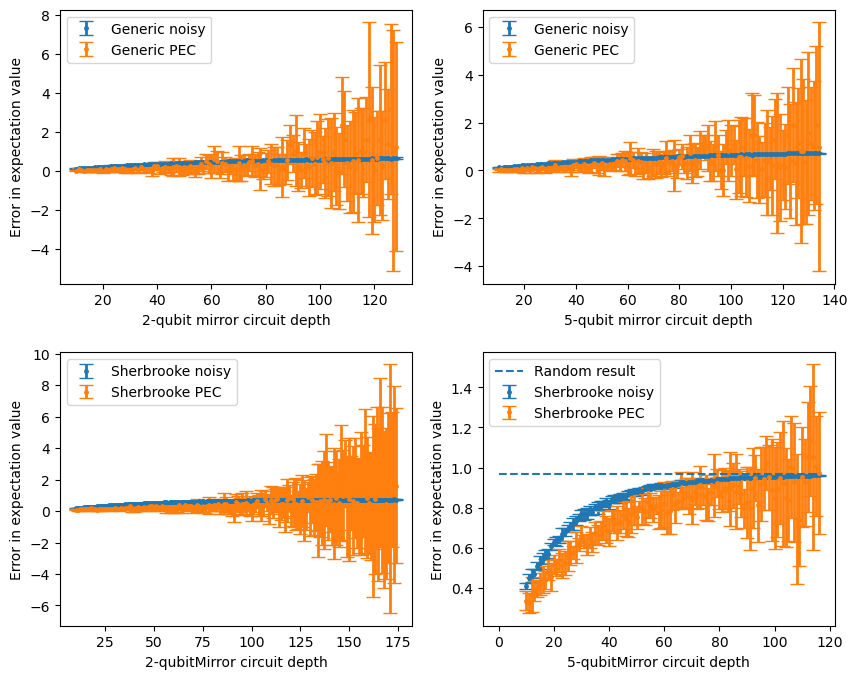

In [142]:
fig =plt.figure()

gs = fig.add_gridspec(2,2, hspace = 0.25)# hspace=0, wspace =0
[[ax1, ax3], [ax2, ax4]] = gs.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)

kwargs = {"capsize": 5, "lw": 2}

# 
ax1.errorbar(generic_2qdepths, generic_raw_2qerrors, yerr= generic_raw_2qstds, label = "Generic noisy", **kwargs, fmt='o', ms=2.5)
ax1.errorbar(generic_2qdepths, generic_pec_2qerrors, yerr= generic_pec_2qstds, label = "Generic PEC", **kwargs, fmt='o', ms=2.5)
ax1.set_xlabel("2-qubit mirror circuit depth")
ax1.set_ylabel("Error in expectation value")
ax1.legend(loc = "upper left")
# 
ax2.errorbar(sherbrooke_2qdepths, sherbrooke_raw_2qerrors, yerr= sherbrooke_raw_2qstds, label = "Sherbrooke noisy", **kwargs, fmt='o', ms=2.5)
ax2.errorbar(sherbrooke_2qdepths, sherbrooke_pec_2qerrors, yerr= sherbrooke_pec_2qstds, label = "Sherbrooke PEC", **kwargs, fmt='o', ms=2.5)
ax2.set_xlabel("2-qubitMirror circuit depth")
ax2.set_ylabel("Error in expectation value")
ax2.legend(loc = "upper left")

# 
ax3.errorbar(generic_5qdepths, generic_raw_5qerrors, yerr= generic_raw_5qstds, label = "Generic noisy", **kwargs, fmt='o', ms=2.5)
ax3.errorbar(generic_5qdepths, generic_pec_5qerrors, yerr= generic_pec_5qstds, label = "Generic PEC", **kwargs, fmt='o', ms=2.5)
ax3.set_xlabel("5-qubit mirror circuit depth")
ax3.set_ylabel("Error in expectation value")
ax3.legend(loc = "upper left")

#
ax4.errorbar(sherbrooke_5qdepths, sherbrooke_raw_5qerrors, yerr= sherbrooke_raw_5qstds, label = "Sherbrooke noisy", **kwargs, fmt='o', ms=2.5)
ax4.errorbar(sherbrooke_5qdepths, sherbrooke_pec_5qerrors, yerr= sherbrooke_pec_5qstds, label = "Sherbrooke PEC", **kwargs, fmt='o', ms=2.5)
ax4.hlines(1-1/32, 0, np.max(sherbrooke_5qdepths), linestyle = "dashed", label = "Random result") #2^5 WAYS TO ARRANGE BITSTRING, RANDOMIZED RESULT GIVES PROB OF 1/32
ax4.set_xlabel("5-qubitMirror circuit depth")
ax4.set_ylabel("Error in expectation value")
ax4.legend(loc = "upper left")

# for ax in fig.get_axes():
#     ax.label_outer()

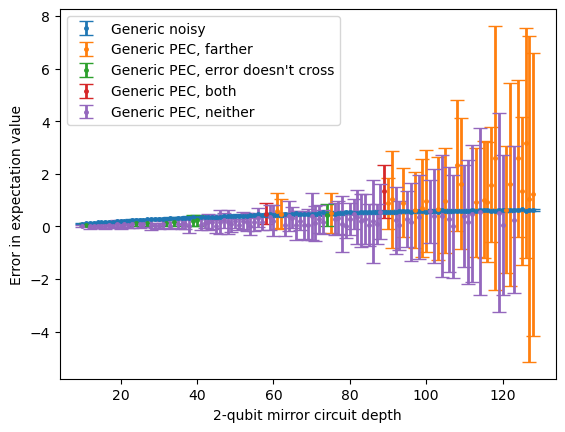

In [143]:
plt.figure()
kwargs = {"capsize": 5, "lw": 2}

plt.errorbar(generic_2qdepths, generic_raw_2qerrors, yerr= generic_raw_2qstds, label = "Generic noisy", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_2qdepths[generic_2q_farther_indicies], generic_pec_2qerrors[generic_2q_farther_indicies], yerr= generic_pec_2qstds[generic_2q_farther_indicies], label = "Generic PEC, farther", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_2qdepths[generic_2q_eb_no_cross_indicies], generic_pec_2qerrors[generic_2q_eb_no_cross_indicies], yerr= generic_pec_2qstds[generic_2q_eb_no_cross_indicies], label = "Generic PEC, error doesn't cross", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_2qdepths[generic_2q_both_indicies], generic_pec_2qerrors[generic_2q_both_indicies], yerr= generic_pec_2qstds[generic_2q_both_indicies], label = "Generic PEC, both", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_2qdepths[generic_2q_neither_indicies], generic_pec_2qerrors[generic_2q_neither_indicies], yerr= generic_pec_2qstds[generic_2q_neither_indicies], label = "Generic PEC, neither", **kwargs, fmt='o', ms=2.5)
plt.xlabel("2-qubit mirror circuit depth")
plt.ylabel("Error in expectation value")
plt.legend(loc = "upper left")

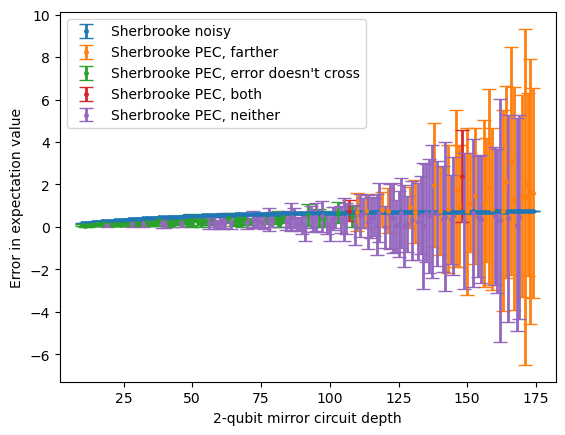

In [144]:
plt.figure()
kwargs = {"capsize": 5, "lw": 2}
# 
plt.errorbar(sherbrooke_2qdepths, sherbrooke_raw_2qerrors, yerr= sherbrooke_raw_2qstds, label = "Sherbrooke noisy", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_2qdepths[sherbrooke_2q_farther_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_farther_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_farther_indicies], label = "Sherbrooke PEC, farther", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_2qdepths[sherbrooke_2q_eb_no_cross_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_eb_no_cross_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_eb_no_cross_indicies], label = "Sherbrooke PEC, error doesn't cross", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_2qdepths[sherbrooke_2q_both_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_both_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_both_indicies], label = "Sherbrooke PEC, both", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_2qdepths[sherbrooke_2q_neither_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_neither_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_neither_indicies], label = "Sherbrooke PEC, neither", **kwargs, fmt='o', ms=2.5)
plt.xlabel("2-qubit mirror circuit depth")
plt.ylabel("Error in expectation value")
plt.legend(loc = "upper left")

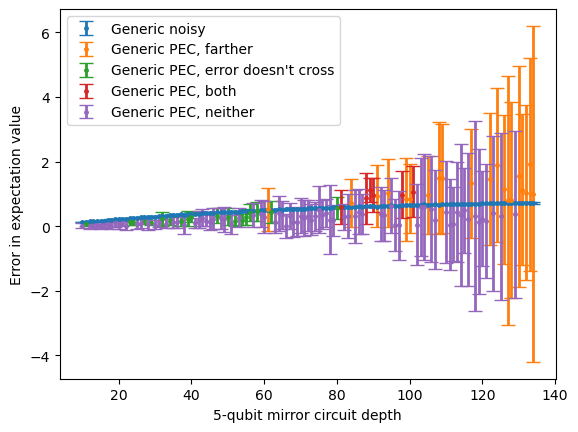

In [145]:
plt.figure()
kwargs = {"capsize": 5, "lw": 2}

plt.errorbar(generic_5qdepths, generic_raw_5qerrors, yerr= generic_raw_5qstds, label = "Generic noisy", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_5qdepths[generic_5q_farther_indicies], generic_pec_5qerrors[generic_5q_farther_indicies], yerr= generic_pec_5qstds[generic_5q_farther_indicies], label = "Generic PEC, farther", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_5qdepths[generic_5q_eb_no_cross_indicies], generic_pec_5qerrors[generic_5q_eb_no_cross_indicies], yerr= generic_pec_5qstds[generic_5q_eb_no_cross_indicies], label = "Generic PEC, error doesn't cross", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_5qdepths[generic_5q_both_indicies], generic_pec_5qerrors[generic_5q_both_indicies], yerr= generic_pec_5qstds[generic_5q_both_indicies], label = "Generic PEC, both", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_5qdepths[generic_5q_neither_indicies], generic_pec_5qerrors[generic_5q_neither_indicies], yerr= generic_pec_5qstds[generic_5q_neither_indicies], label = "Generic PEC, neither", **kwargs, fmt='o', ms=2.5)
plt.xlabel("5-qubit mirror circuit depth")
plt.ylabel("Error in expectation value")
plt.legend(loc = "upper left")

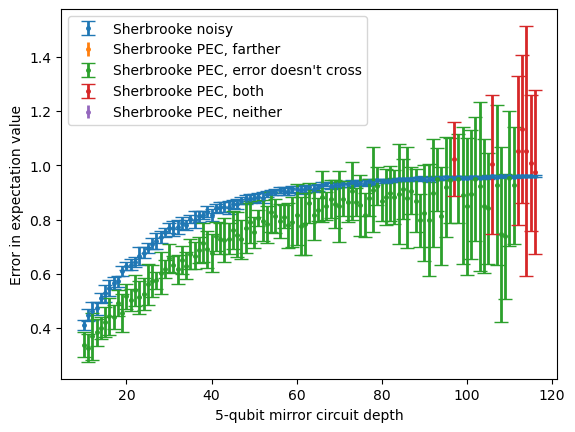

In [146]:
plt.figure()
kwargs = {"capsize": 5, "lw": 2}
# 
plt.errorbar(sherbrooke_5qdepths, sherbrooke_raw_5qerrors, yerr= sherbrooke_raw_5qstds, label = "Sherbrooke noisy", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_5qdepths[sherbrooke_5q_farther_indicies], sherbrooke_pec_5qerrors[sherbrooke_5q_farther_indicies], yerr= sherbrooke_pec_5qstds[sherbrooke_5q_farther_indicies], label = "Sherbrooke PEC, farther", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_5qdepths[sherbrooke_5q_eb_no_cross_indicies], sherbrooke_pec_5qerrors[sherbrooke_5q_eb_no_cross_indicies], yerr= sherbrooke_pec_5qstds[sherbrooke_5q_eb_no_cross_indicies], label = "Sherbrooke PEC, error doesn't cross", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_5qdepths[sherbrooke_5q_both_indicies], sherbrooke_pec_5qerrors[sherbrooke_5q_both_indicies], yerr= sherbrooke_pec_5qstds[sherbrooke_5q_both_indicies], label = "Sherbrooke PEC, both", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_5qdepths[sherbrooke_5q_neither_indicies], sherbrooke_pec_5qerrors[sherbrooke_5q_neither_indicies], yerr= sherbrooke_pec_5qstds[sherbrooke_5q_neither_indicies], label = "Sherbrooke PEC, neither", **kwargs, fmt='o', ms=2.5)
plt.xlabel("5-qubit mirror circuit depth")
plt.ylabel("Error in expectation value")
plt.legend(loc = "upper left")

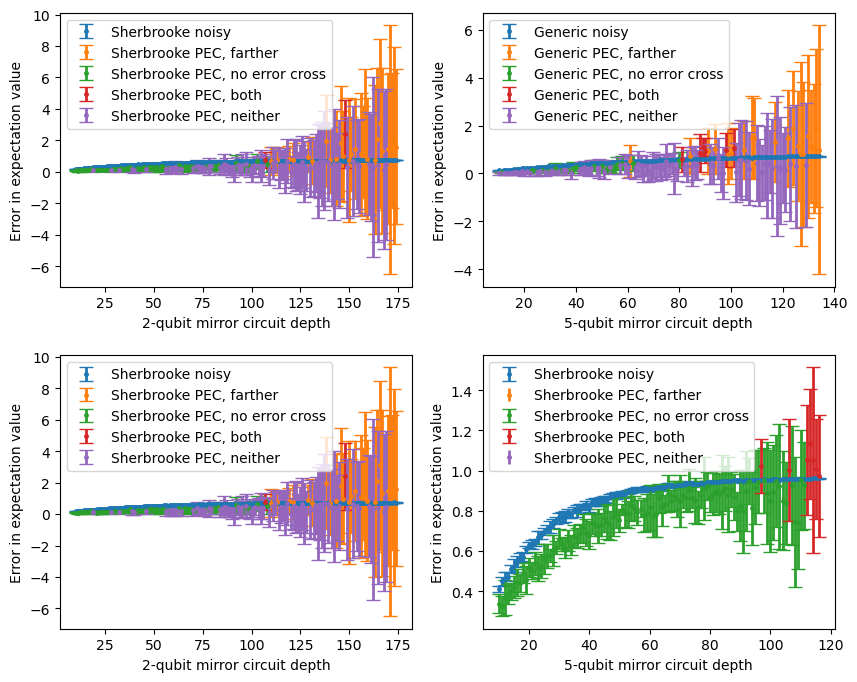

In [147]:
fig =plt.figure()

gs = fig.add_gridspec(2,2, hspace = 0.25)# hspace=0, wspace =0
[[ax1, ax3], [ax2, ax4]] = gs.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)

kwargs = {"capsize": 5, "lw": 2}

# 
ax1.errorbar(sherbrooke_2qdepths, sherbrooke_raw_2qerrors, yerr= sherbrooke_raw_2qstds, label = "Sherbrooke noisy", **kwargs, fmt='o', ms=2.5)
ax1.errorbar(sherbrooke_2qdepths[sherbrooke_2q_farther_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_farther_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_farther_indicies], label = "Sherbrooke PEC, farther", **kwargs, fmt='o', ms=2.5)
ax1.errorbar(sherbrooke_2qdepths[sherbrooke_2q_eb_no_cross_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_eb_no_cross_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_eb_no_cross_indicies], label = "Sherbrooke PEC, no error cross", **kwargs, fmt='o', ms=2.5)
ax1.errorbar(sherbrooke_2qdepths[sherbrooke_2q_both_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_both_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_both_indicies], label = "Sherbrooke PEC, both", **kwargs, fmt='o', ms=2.5)
ax1.errorbar(sherbrooke_2qdepths[sherbrooke_2q_neither_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_neither_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_neither_indicies], label = "Sherbrooke PEC, neither", **kwargs, fmt='o', ms=2.5)
ax1.set_xlabel("2-qubit mirror circuit depth")
ax1.set_ylabel("Error in expectation value")
ax1.legend(loc = "upper left")
# 
ax2.errorbar(sherbrooke_2qdepths, sherbrooke_raw_2qerrors, yerr= sherbrooke_raw_2qstds, label = "Sherbrooke noisy", **kwargs, fmt='o', ms=2.5)
ax2.errorbar(sherbrooke_2qdepths[sherbrooke_2q_farther_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_farther_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_farther_indicies], label = "Sherbrooke PEC, farther", **kwargs, fmt='o', ms=2.5)
ax2.errorbar(sherbrooke_2qdepths[sherbrooke_2q_eb_no_cross_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_eb_no_cross_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_eb_no_cross_indicies], label = "Sherbrooke PEC, no error cross", **kwargs, fmt='o', ms=2.5)
ax2.errorbar(sherbrooke_2qdepths[sherbrooke_2q_both_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_both_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_both_indicies], label = "Sherbrooke PEC, both", **kwargs, fmt='o', ms=2.5)
ax2.errorbar(sherbrooke_2qdepths[sherbrooke_2q_neither_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_neither_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_neither_indicies], label = "Sherbrooke PEC, neither", **kwargs, fmt='o', ms=2.5)
ax2.set_xlabel("2-qubit mirror circuit depth")
ax2.set_ylabel("Error in expectation value")
ax2.legend(loc = "upper left")
# 
ax3.errorbar(generic_5qdepths, generic_raw_5qerrors, yerr= generic_raw_5qstds, label = "Generic noisy", **kwargs, fmt='o', ms=2.5)
ax3.errorbar(generic_5qdepths[generic_5q_farther_indicies], generic_pec_5qerrors[generic_5q_farther_indicies], yerr= generic_pec_5qstds[generic_5q_farther_indicies], label = "Generic PEC, farther", **kwargs, fmt='o', ms=2.5)
ax3.errorbar(generic_5qdepths[generic_5q_eb_no_cross_indicies], generic_pec_5qerrors[generic_5q_eb_no_cross_indicies], yerr= generic_pec_5qstds[generic_5q_eb_no_cross_indicies], label = "Generic PEC, no error cross", **kwargs, fmt='o', ms=2.5)
ax3.errorbar(generic_5qdepths[generic_5q_both_indicies], generic_pec_5qerrors[generic_5q_both_indicies], yerr= generic_pec_5qstds[generic_5q_both_indicies], label = "Generic PEC, both", **kwargs, fmt='o', ms=2.5)
ax3.errorbar(generic_5qdepths[generic_5q_neither_indicies], generic_pec_5qerrors[generic_5q_neither_indicies], yerr= generic_pec_5qstds[generic_5q_neither_indicies], label = "Generic PEC, neither", **kwargs, fmt='o', ms=2.5)
ax3.set_xlabel("5-qubit mirror circuit depth")
ax3.set_ylabel("Error in expectation value")
ax3.legend(loc = "upper left")

#
ax4.errorbar(sherbrooke_5qdepths, sherbrooke_raw_5qerrors, yerr= sherbrooke_raw_5qstds, label = "Sherbrooke noisy", **kwargs, fmt='o', ms=2.5)
ax4.errorbar(sherbrooke_5qdepths[sherbrooke_5q_farther_indicies], sherbrooke_pec_5qerrors[sherbrooke_5q_farther_indicies], yerr= sherbrooke_pec_5qstds[sherbrooke_5q_farther_indicies], label = "Sherbrooke PEC, farther", **kwargs, fmt='o', ms=2.5)
ax4.errorbar(sherbrooke_5qdepths[sherbrooke_5q_eb_no_cross_indicies], sherbrooke_pec_5qerrors[sherbrooke_5q_eb_no_cross_indicies], yerr= sherbrooke_pec_5qstds[sherbrooke_5q_eb_no_cross_indicies], label = "Sherbrooke PEC, no error cross", **kwargs, fmt='o', ms=2.5)
ax4.errorbar(sherbrooke_5qdepths[sherbrooke_5q_both_indicies], sherbrooke_pec_5qerrors[sherbrooke_5q_both_indicies], yerr= sherbrooke_pec_5qstds[sherbrooke_5q_both_indicies], label = "Sherbrooke PEC, both", **kwargs, fmt='o', ms=2.5)
ax4.errorbar(sherbrooke_5qdepths[sherbrooke_5q_neither_indicies], sherbrooke_pec_5qerrors[sherbrooke_5q_neither_indicies], yerr= sherbrooke_pec_5qstds[sherbrooke_5q_neither_indicies], label = "Sherbrooke PEC, neither", **kwargs, fmt='o', ms=2.5)
ax4.set_xlabel("5-qubit mirror circuit depth")
ax4.set_ylabel("Error in expectation value")
ax4.legend(loc = "upper left")

# for ax in fig.get_axes():
#     ax.label_outer()

No Break data

(Names are overwritten, sorry I know its confusing I just couldn't be bothered to change them)

In [148]:
# Generic data

generic_ideal_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\NO_BREAK_Generic_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\true_values2025-05-30_09-48-25.txt", delimiter = " ")
generic_ideal_2qavgs = np.average(generic_ideal_2qvals, axis=1)

generic_raw_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\NO_BREAK_Generic_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\noisy_values2025-05-30_09-48-25.txt", delimiter = " ")
generic_raw_2qavgs = np.average(generic_raw_2qvals, axis=1)
generic_raw_2qstds = np.std(generic_raw_2qvals, axis=1, ddof=1)
generic_raw_2qpercentile = np.percentile(generic_raw_2qvals, 10, axis=1)

generic_pec_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\NO_BREAK_Generic_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\pec_values2025-05-30_09-48-25.txt", delimiter = " ")
generic_pec_2qavgs = np.average(generic_pec_2qvals, axis=1)
generic_pec_2qstds = np.std(generic_pec_2qvals, axis=1, ddof=1)
generic_pec_2qpercentile = np.percentile(generic_pec_2qvals, 10, axis=1)

generic_2qdepths = np.arange(20,len(generic_ideal_2qvals)+20)

generic_raw_2qerrors = np.abs([a_i - b_i for a_i, b_i in zip(generic_raw_2qavgs, generic_ideal_2qavgs)])
generic_pec_2qerrors = np.abs([a_i - b_i for a_i, b_i in zip(generic_pec_2qavgs, generic_ideal_2qavgs)])


# Sherbrooke data
sherbrooke_ideal_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\NO_BREAK_Sherbrooke_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\true_values2025-05-31_06-01-30.txt", delimiter = " ")
sherbrooke_ideal_2qavgs = np.average(sherbrooke_ideal_2qvals, axis=1)

sherbrooke_raw_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\NO_BREAK_Sherbrooke_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\noisy_values2025-05-31_06-01-30.txt", delimiter = " ")
sherbrooke_raw_2qavgs = np.average(sherbrooke_raw_2qvals, axis=1)
sherbrooke_raw_2qstds = np.std(sherbrooke_raw_2qvals, axis=1, ddof=1)

sherbrooke_pec_2qvals = np.genfromtxt("C:\\Users\\munkr\\Documents\\GitHub\\EE522_25_3\\Notebooks\\PEC\\Data\\NO_BREAK_Sherbrooke_PEC_mirror_nqubits_2_shots_10000_trials_10_Test_Depths\\pec_values2025-05-31_06-01-30.txt", delimiter = " ")
sherbrooke_pec_2qavgs = np.average(sherbrooke_pec_2qvals, axis=1)
sherbrooke_pec_2qstds = np.std(sherbrooke_pec_2qvals, axis=1, ddof=1)

sherbrooke_2qdepths = np.arange(10,len(sherbrooke_ideal_2qavgs)+10)

sherbrooke_raw_2qerrors = np.abs([a_i - b_i for a_i, b_i in zip(sherbrooke_raw_2qavgs, sherbrooke_ideal_2qavgs)])
sherbrooke_pec_2qerrors = np.abs([a_i - b_i for a_i, b_i in zip(sherbrooke_pec_2qavgs,sherbrooke_ideal_2qavgs)])

Split data by usefulness metric

In [149]:
# Generic
generic_2q_farther_indicies = [] #pec farther than raw
generic_2q_eb_no_cross_indicies = [] #pec errorbar doesn't cross true
generic_2q_both_indicies = [] #both of the above
generic_2q_neither_indicies = [] #neither of the above

for i in range(0, len(generic_2qdepths)):
    if generic_pec_2qerrors[i] > generic_raw_2qerrors[i]: #pec farther than raw
        if generic_pec_2qerrors[i] - generic_pec_2qstds[i] >0: #pec errorbar doesn't cross true
            generic_2q_both_indicies.append(i) # both of the above
        else:
            generic_2q_farther_indicies.append(i) #just farther
    elif generic_pec_2qerrors[i] - generic_pec_2qstds[i] >0: #pec errorbar doesn't cross true
        generic_2q_eb_no_cross_indicies.append(i)
    else:
        generic_2q_neither_indicies.append(i)

# Sherbrooke
sherbrooke_2q_farther_indicies = [] #pec farther than raw
sherbrooke_2q_eb_no_cross_indicies = [] #pec errorbar doesn't cross true
sherbrooke_2q_both_indicies = [] #both of the above
sherbrooke_2q_neither_indicies = [] #neither of the above

for i in range(0, len(sherbrooke_2qdepths)):
    if sherbrooke_pec_2qerrors[i] > sherbrooke_raw_2qerrors[i]: #pec farther than raw
        if sherbrooke_pec_2qerrors[i] - sherbrooke_pec_2qstds[i] >0: #pec errorbar doesn't cross true
            sherbrooke_2q_both_indicies.append(i) # both of the above
        else:
            sherbrooke_2q_farther_indicies.append(i) #just farther
    elif sherbrooke_pec_2qerrors[i] - sherbrooke_pec_2qstds[i] >0: #pec errorbar doesn't cross true
        sherbrooke_2q_eb_no_cross_indicies.append(i)
    else:
        sherbrooke_2q_neither_indicies.append(i)
        

Graph

In [150]:
print(generic_2q_neither_indicies)

[2, 5, 6, 9, 13, 16, 23, 25, 26, 27, 29, 32, 34, 37, 39, 40, 42, 44, 48, 53, 55, 58, 63, 68, 73, 74, 76, 77, 90, 92, 101, 107, 111, 117, 145, 153, 168]


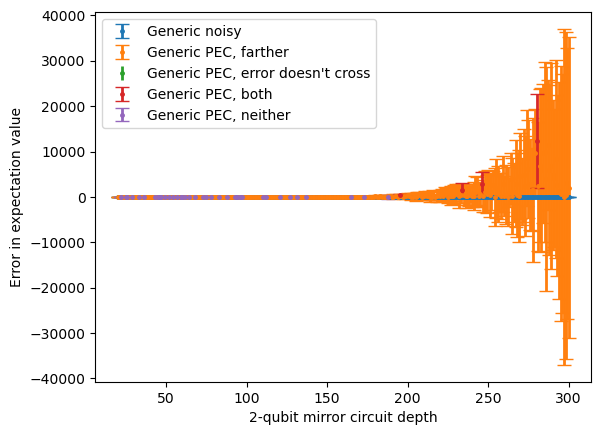

In [151]:
plt.figure()
kwargs = {"capsize": 5, "lw": 2}

# 
plt.errorbar(generic_2qdepths, generic_raw_2qerrors, yerr= generic_raw_2qstds, label = "Generic noisy", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_2qdepths[generic_2q_farther_indicies], generic_pec_2qerrors[generic_2q_farther_indicies], yerr= generic_pec_2qstds[generic_2q_farther_indicies], label = "Generic PEC, farther", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_2qdepths[generic_2q_eb_no_cross_indicies], generic_pec_2qerrors[generic_2q_eb_no_cross_indicies], yerr= generic_pec_2qstds[generic_2q_eb_no_cross_indicies], label = "Generic PEC, error doesn't cross", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_2qdepths[generic_2q_both_indicies], generic_pec_2qerrors[generic_2q_both_indicies], yerr= generic_pec_2qstds[generic_2q_both_indicies], label = "Generic PEC, both", **kwargs, fmt='o', ms=2.5)
plt.errorbar(generic_2qdepths[generic_2q_neither_indicies], generic_pec_2qerrors[generic_2q_neither_indicies], yerr= generic_pec_2qstds[generic_2q_neither_indicies], label = "Generic PEC, neither", **kwargs, fmt='o', ms=2.5)
plt.xlabel("2-qubit mirror circuit depth")
plt.ylabel("Error in expectation value")
plt.legend(loc = "upper left")

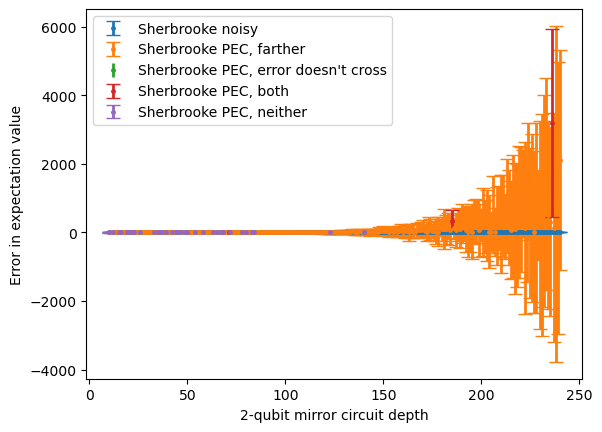

In [152]:
plt.figure()
kwargs = {"capsize": 5, "lw": 2}
# 
plt.errorbar(sherbrooke_2qdepths, sherbrooke_raw_2qerrors, yerr= sherbrooke_raw_2qstds, label = "Sherbrooke noisy", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_2qdepths[sherbrooke_2q_farther_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_farther_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_farther_indicies], label = "Sherbrooke PEC, farther", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_2qdepths[sherbrooke_2q_eb_no_cross_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_eb_no_cross_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_eb_no_cross_indicies], label = "Sherbrooke PEC, error doesn't cross", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_2qdepths[sherbrooke_2q_both_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_both_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_both_indicies], label = "Sherbrooke PEC, both", **kwargs, fmt='o', ms=2.5)
plt.errorbar(sherbrooke_2qdepths[sherbrooke_2q_neither_indicies], sherbrooke_pec_2qerrors[sherbrooke_2q_neither_indicies], yerr= sherbrooke_pec_2qstds[sherbrooke_2q_neither_indicies], label = "Sherbrooke PEC, neither", **kwargs, fmt='o', ms=2.5)
plt.xlabel("2-qubit mirror circuit depth")
plt.ylabel("Error in expectation value")
plt.legend(loc = "upper left")